<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/04.%ED%83%90%EC%83%89%EC%A0%81%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch04_02_%ED%9A%8C%EA%B7%80%EB%AC%B8%EC%A0%9CEDA_diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.02. 회귀문제 EDA - diamonds
---
* 날짜: 2022-05-10
* 이름: 고민수

## 학습내용
    - diamonds 데이터 EDA
    - 회귀문제 에서의 탐색적 데이터 분석 진행

## 라이브러리 및 데이터 로드
---

* 라이브러리 불러오기

In [9]:
def get_unique(df, index):
    # df 데이터 프레임
    # 특성의 고윳값의 index 번째
    temp_i = index
    temp = []
    for h in df.columns:
        temp1 = []
        temp_i = index
        if  df[h].nunique() >=5 :
            max_index = 4
        elif df[h].nunique() ==4:
            max_index = 3
        elif df[h].nunique() ==3:
            max_index = 2
        elif df[h].nunique() ==2:
            max_index = 1
        else:
            max_index = 0
        
        if temp_i>max_index:
            temp_i=max_index
            temp1.append("NaN")
            temp1.append("NaN")
            temp.append(temp1)
            continue
        temp1.append(df[h].unique()[temp_i])
        temp1.append((df[h]==df[h].unique()[temp_i]).sum())
        temp.append(temp1)
    return temp



def resumetable(df):
    
    print(f'데이터 셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=["데이터 타입"])
    summary = summary.reset_index()
    summary = summary.rename(columns={ 'index' : '피처' })
    summary["결측값 개수"] = df.isnull().sum().values
    summary["고윳값 개수"] = df.nunique().values
    summary["1번째"] = get_unique(df, 0)
    summary["2번째"] = get_unique(df, 1)
    summary["3번째"] = get_unique(df, 2)
    summary["4번째"] = get_unique(df, 3)
    summary["5번째"] = get_unique(df, 4)


    return summary

In [3]:
# 데이터 분석을 위한 pandas 라이브러리를 불러옵니다.
# 수치계산을 위한 numpy를 불러옵니다.
# 데이터 시각화를 위한 matplotlib, seaborn 을 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {"figure.figsize" : (8,6)})

* seaborn에서 제공하는 `diamonds` 데이터셋을 불러오기

In [4]:
df = sns.load_dataset('diamonds')

* 데이터셋 일부 확인

In [6]:
df.tail(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [10]:
resumetable(df)

데이터 셋 형상 : (53940, 10)


,피처,데이터 타입,결측값 개수,고윳값 개수,1번째,2번째,3번째,4번째,5번째
0,carat,float64,0,273,"[0.23, 293]","[0.21, 9]","[0.29, 130]","[0.31, 2249]","[0.24, 254]"
1,cut,category,0,5,"[Ideal, 21551]","[Premium, 13791]","[Good, 4906]","[Very Good, 12082]","[Fair, 1610]"
2,color,category,0,7,"[E, 9797]","[I, 5422]","[J, 2808]","[H, 8304]","[F, 9542]"
3,clarity,category,0,8,"[SI2, 9194]","[SI1, 13065]","[VS1, 8171]","[VS2, 12258]","[VVS2, 5066]"
4,depth,float64,0,184,"[61.5, 1719]","[59.8, 412]","[56.9, 26]","[62.4, 1792]","[63.3, 705]"
5,table,float64,0,127,"[55.0, 6268]","[61.0, 2282]","[65.0, 146]","[58.0, 8369]","[57.0, 9724]"
6,price,int64,0,11602,"[326, 2]","[327, 1]","[334, 1]","[335, 1]","[336, 2]"
7,x,float64,0,554,"[3.95, 44]","[3.89, 11]","[4.05, 36]","[4.2, 50]","[4.34, 437]"
8,y,float64,0,552,"[3.98, 35]","[3.84, 5]","[4.07, 51]","[4.23, 86]","[4.35, 425]"
9,z,float64,0,375,"[2.43, 54]","[2.31, 6]","[2.63, 230]","[2.75, 469]","[2.48, 95]"


## 데이터 기본 확인
---

### **| 결측치 확인**

* 결측지 개수 확인

In [10]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### **| 기술통계**

* `info` 이용해 데이터 확인

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [12]:
resumetable(df)

데이터 셋 형상 : (53940, 10)


,피처,데이터 타입,결측값 개수,고윳값 개수,고윳값 1번째,고윳값 2번째,고윳값 3번째,고윳값 4번째,고윳값 5번째
0,carat,float64,0,273,0.23,0.21,0.29,0.31,0.24
1,cut,category,0,5,Ideal,Premium,Good,Very Good,Fair
2,color,category,0,7,E,I,J,H,F
3,clarity,category,0,8,SI2,SI1,VS1,VS2,VVS2
4,depth,float64,0,184,61.5,59.8,56.9,62.4,63.3
5,table,float64,0,127,55.0,61.0,65.0,58.0,57.0
6,price,int64,0,11602,326,327,334,335,336
7,x,float64,0,554,3.95,3.89,4.05,4.2,4.34
8,y,float64,0,552,3.98,3.84,4.07,4.23,4.35
9,z,float64,0,375,2.43,2.31,2.63,2.75,2.48


### **| 변수 요약**

* 모든 속성의 분포 간단히 그리기

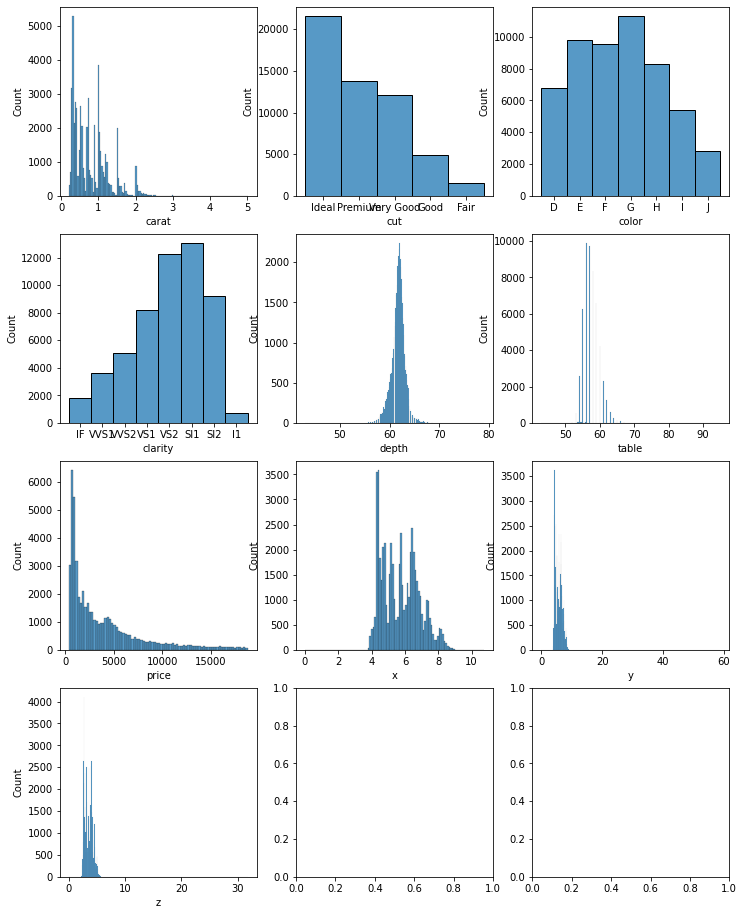

In [15]:
f, axes = plt.subplots(4,3, figsize=(12,16))
axes = axes.flatten()
for col, ax in zip(df.columns, axes):
    sns.histplot(data=df, x=col, ax=ax)
plt.show()

In [50]:
df["N_price"] = np.log(df["price"])

<AxesSubplot:xlabel='N_price', ylabel='Count'>

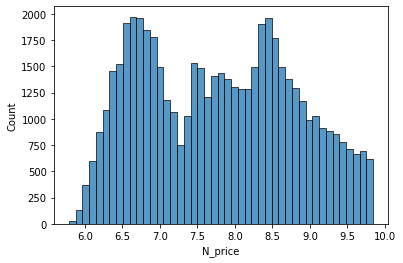

In [22]:
sns.histplot(data=df, x="N_price")

* 자료형 정리하기

In [48]:
nums = ["x","y","z","table","depth","carat"]
noms = ["cut", "color", "clarity"]
y = "N_price"

* 데이터 정리하기
  * 데이터 소개: 
  * 자료형 소개
  * 모델링을 위한 자료형 구분:



## 데이터 분포
---

### **| 데이터 분포 시각화**

* 연속 자료형 분포 그리기

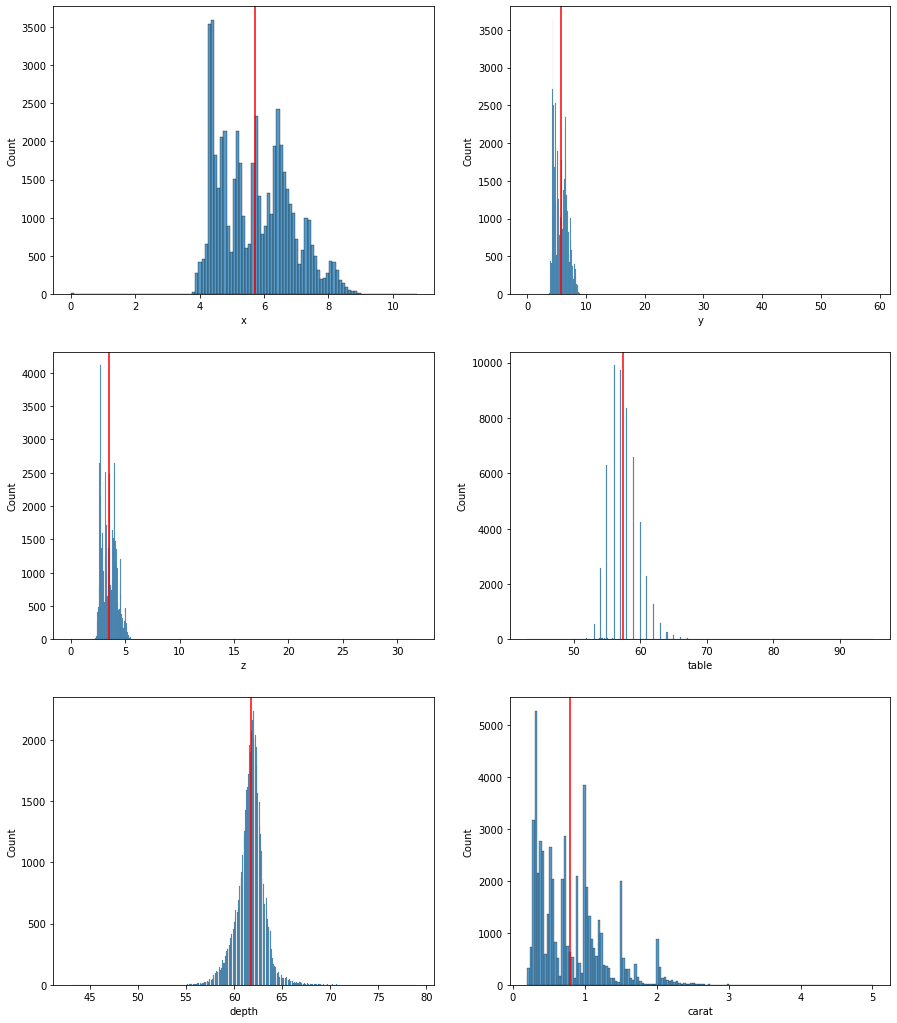

In [18]:
f, axes = plt.subplots(3,2, figsize=(15,18))
plt.subplots_adjust(wspace=0.2, hspace=0.2) # 좌우/ 상하 여백
axes = axes.flatten()
for col, ax in zip(nums, axes):
    sns.histplot(data=df, x=col, ax=ax).axvline(x=df[col].mean(),color="r")
plt.show()

* 이산 자료형 분포 그리기

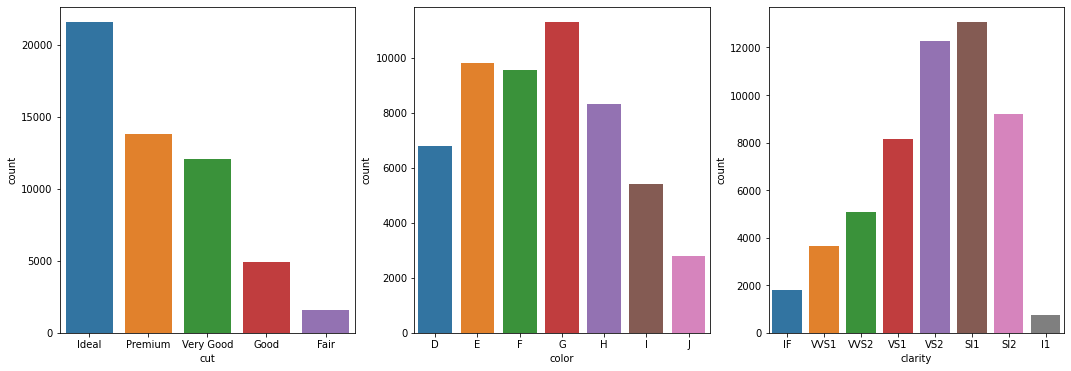

In [27]:
f, axes = plt.subplots(1,3, figsize=(18,6))
plt.subplots_adjust(wspace=0.2, hspace=0.2) # 좌우/ 상하 여백
axes = axes.flatten()
for col, ax in zip(noms, axes):
    sns.countplot(data=df, x=col, ax=ax)
plt.show()

* 순서가 있는 데이터, 순서 넣기

In [33]:
df["cut"].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [34]:
from pandas.api.types import CategoricalDtype

cut_value = ["Fair","Good","Very Good","Premium","Ideal"]
color_value = ["J","I","H","G","F","E","D"]
clarify_value = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]

cut_dtype = CategoricalDtype(categories=cut_value, ordered=True)
color_dtype = CategoricalDtype(categories=color_value, ordered=True)
clarify_dtype = CategoricalDtype(categories=clarify_value, ordered=True)

# noms = ["cut", "color", "clarity"]

df["cut"] = df["cut"].astype(cut_dtype)
df["color"] = df["color"].astype(color_dtype)
df["clarity"] = df["clarity"].astype(clarify_dtype)

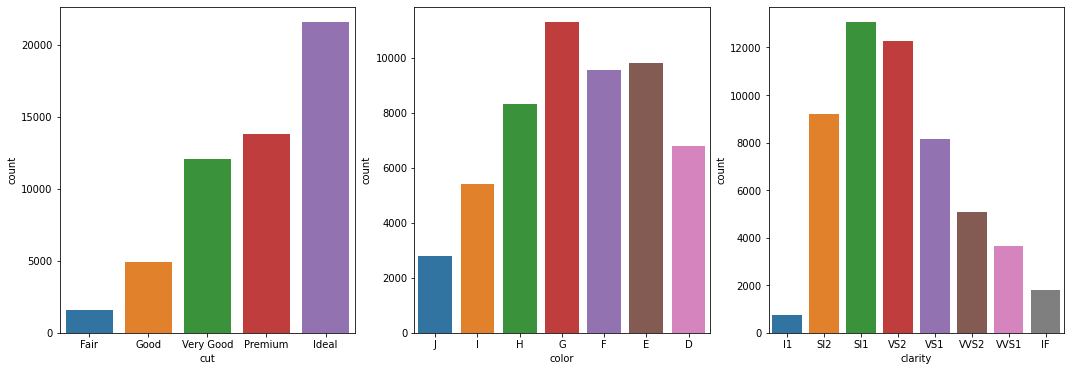

In [35]:
f, axes = plt.subplots(1,3, figsize=(18,6))
plt.subplots_adjust(wspace=0.2, hspace=0.2) # 좌우/ 상하 여백
axes = axes.flatten()
for col, ax in zip(noms, axes):
    sns.countplot(data=df, x=col, ax=ax)
plt.show()

### | **기술 통계량 시각화**

* 기술통계량 확인

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
 10  N_price  53940 non-null  float64 
dtypes: category(3), float64(7), int64(1)
memory usage: 3.4 MB


* `boxplot` 으로 연속 자료형 기술 통계 시각화하기

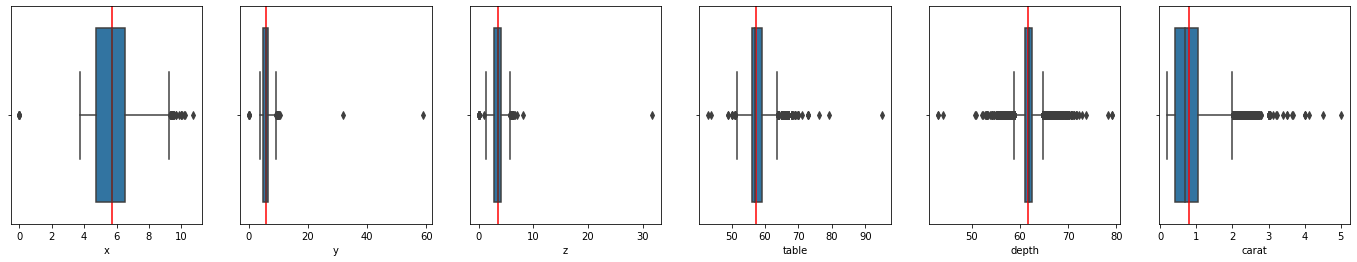

In [38]:
f, axes = plt.subplots(1,len(nums), figsize=(4*len(nums),4))
plt.subplots_adjust(wspace=0.2, hspace=0.2) # 좌우/ 상하 여백
axes = axes.flatten()
for col, ax in zip(nums, axes):
    sns.boxplot(data=df, x=col, ax=ax).axvline(x=df[col].mean(),color="r")
plt.show()

* `viloinplot` 으로 연속 자료형 기술 통계 시각화하기

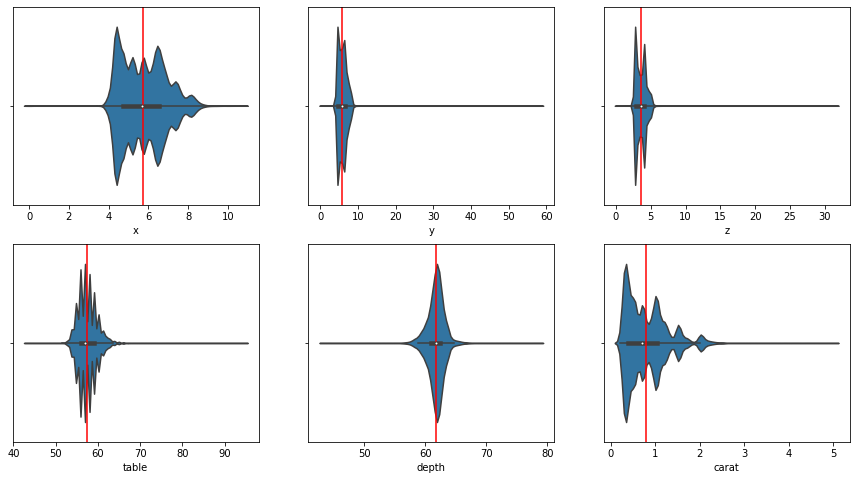

In [44]:
f, axes = plt.subplots(2,3, figsize=(15,8))
plt.subplots_adjust(wspace=0.2, hspace=0.2) # 좌우/ 상하 여백
axes = axes.flatten()
for col, ax in zip(nums, axes):
    sns.violinplot(data=df, x=col, ax=ax).axvline(x=df[col].mean(),color="r")
plt.show()

### **| 왜도와 첨도**

* `skew` 이용해 왜도 구하기

In [45]:
df.skew()

C:\Users\user\AppData\Local\Temp/ipykernel_9080/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64

* `kurt` 이용해 첨도 구하기

In [46]:
df.kurt()

C:\Users\user\AppData\Local\Temp/ipykernel_9080/1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


carat     1.256635
depth     5.739415
table     2.801857
price     2.177696
x        -0.618161
y        91.214557
z        47.086619
dtype: float64

### **| 예측값에 대한 추가 시각화**

* `displot`으로 그리기


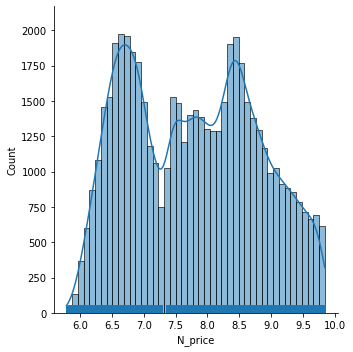

In [51]:
# y = "log(price)"
sns.displot(data=df, x=y, kde=True, rug=True)

* `boxplot`으로 기술통계 시각화 하기

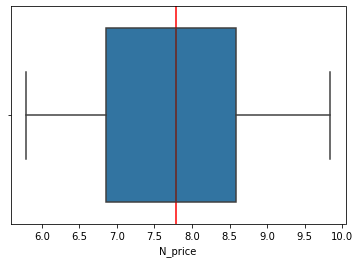

In [52]:
sns.boxplot(data=df, x=y).axvline(x=df[y].mean(),color="r")

* `violinplot`으로 기술통계 시각화 하기

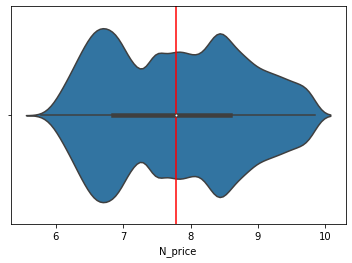

In [53]:
sns.violinplot(data=df, x=y).axvline(x=df[y].mean(),color="r")

* `describe` 로 `price`의 기술통계 값 구하기

In [54]:
df.describe()

,carat,depth,table,price,x,y,z,N_price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,7.786768
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.014649
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,5.786897
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,6.856462
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,7.783641
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,8.580027
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,9.842835


* `price` 를 `agg` 를 이용해 여러가지 통계량 구하기

In [55]:
df.N_price.agg( [ "min","max","mean", "skew", "kurt"] )

min     5.786897
max     9.842835
mean    7.786768
skew    0.115296
kurt   -1.096785
Name: N_price, dtype: float64

## 속성간 관계 파악
---

### **| 상관분석**

* `corr`를 이용해 상관계수 구하기

In [80]:
df.corr()

,carat,depth,table,price,x,y,z,N_price
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.920207
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.000860
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.158208
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.895771
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.958010
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.936173
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.935218
N_price,0.920207,0.000860,0.158208,0.895771,0.958010,0.936173,0.935218,1.000000


* `style.background_gradient` 이용해 상관계수 시각화 하기

In [81]:
df.corr().style.background_gradient(cmap="coolwarm",)

,carat,depth,table,price,x,y,z,N_price
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.920207
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.000860
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.158208
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.895771
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.958010
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.936173
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.935218
N_price,0.920207,0.000860,0.158208,0.895771,0.958010,0.936173,0.935218,1.000000


* `heatmap` 이용해 상관계수 시각화 하기

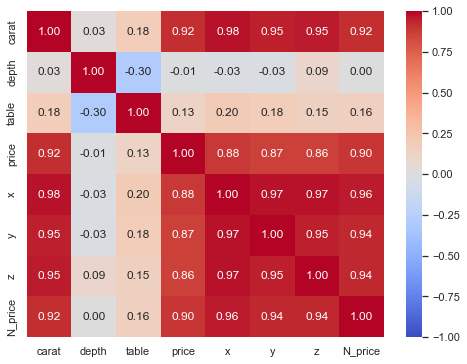

In [68]:
_ =sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True, vmax=1, vmin=-1, fmt=".2f")

* 예측값과 관련있는 속성 순서대로 정리하기

In [ ]:
# x, y, z, 

### **| 속성간 관계 시각화**

* `pairplot` 이용해 시각화 하기 

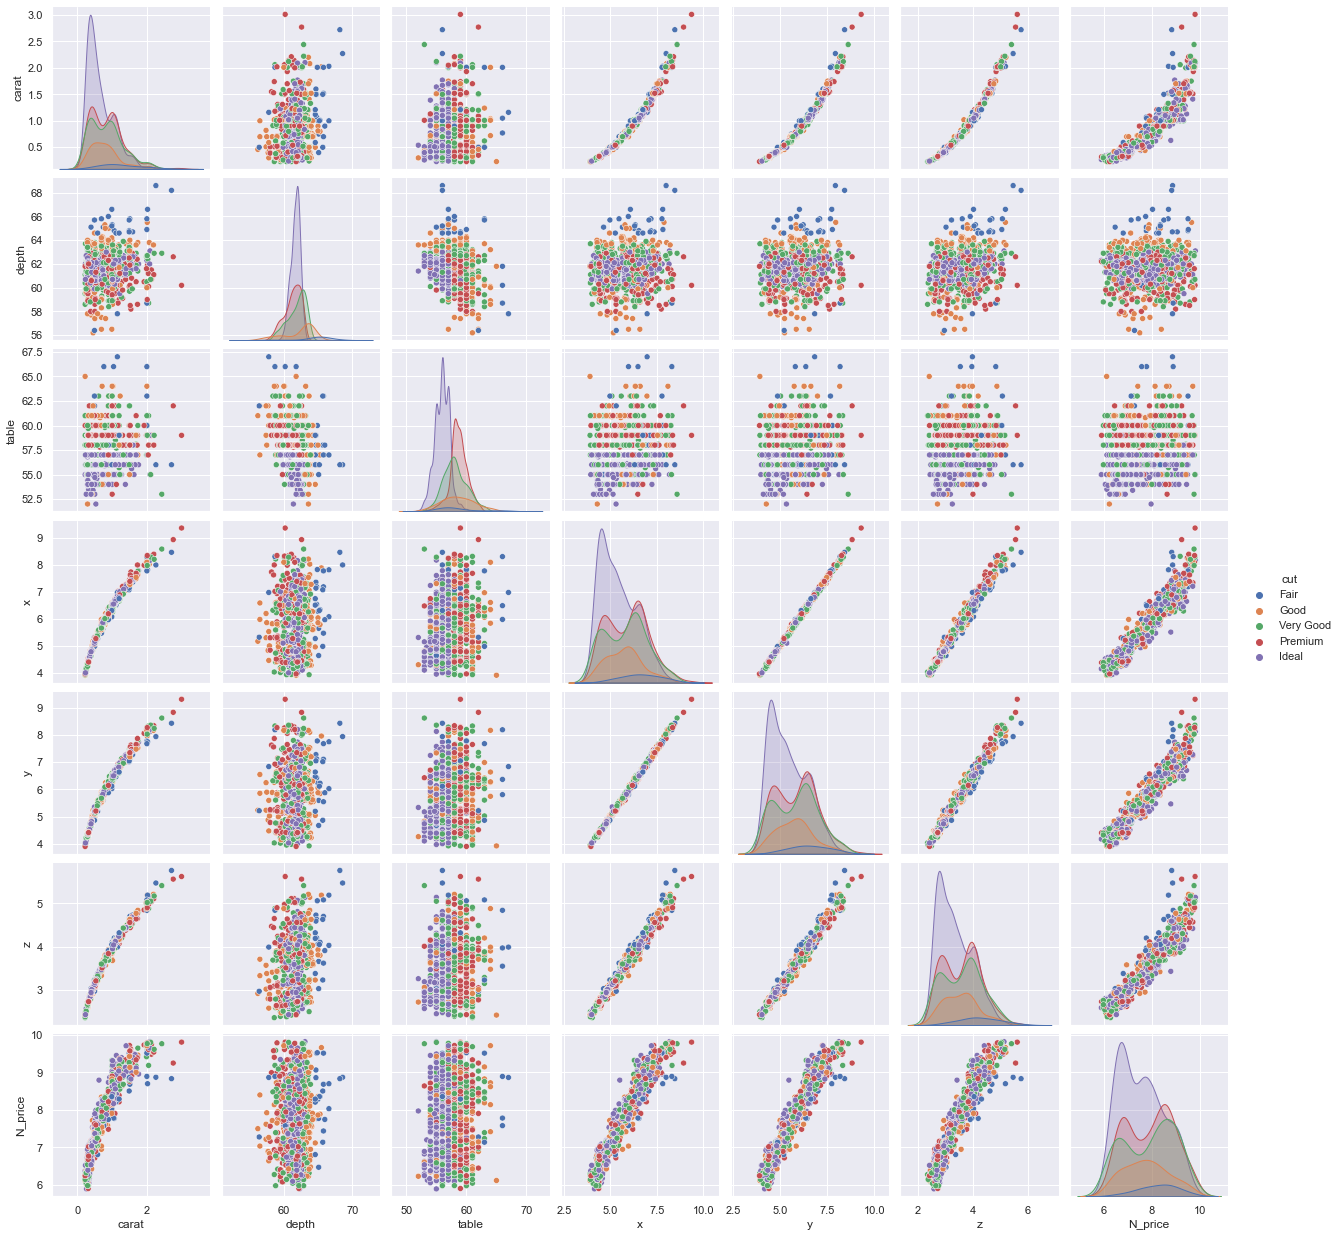

In [87]:
# pairplot 은 시간이 오래 걸리기 때문에 일부 샘플을 추출해 그리는게 좋습니다.
temp = df.drop("price",axis=1).sample(1000)
sns.pairplot(temp, hue="cut")

* `boxplot`으로 범주 속성별 예측값 관계 시각화하기

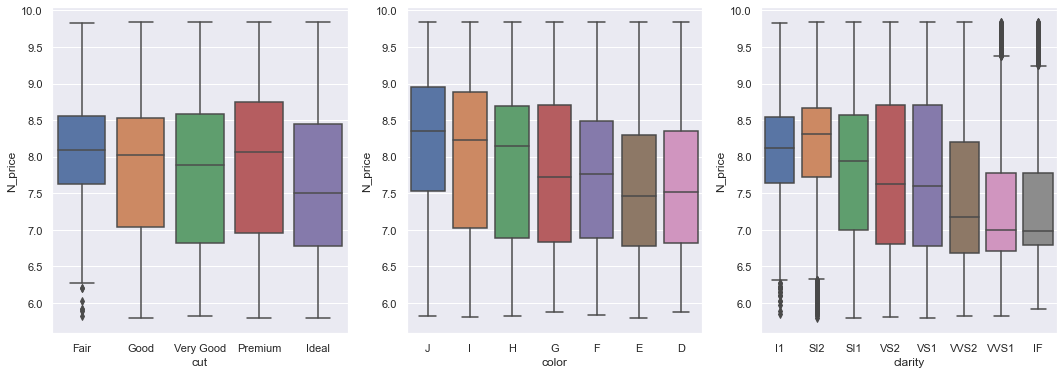

In [89]:
f, axes = plt.subplots(1,3, figsize=(18,6))
plt.subplots_adjust(wspace=0.2, hspace=0.2) # 좌우/ 상하 여백
axes = axes.flatten()
for col, ax in zip(noms, axes):
    sns.boxplot(data=df,x=col, y="N_price", ax=ax)

* `scatterplot` 이용해 연속 자료형 별 예측값의 관계 시각화하기

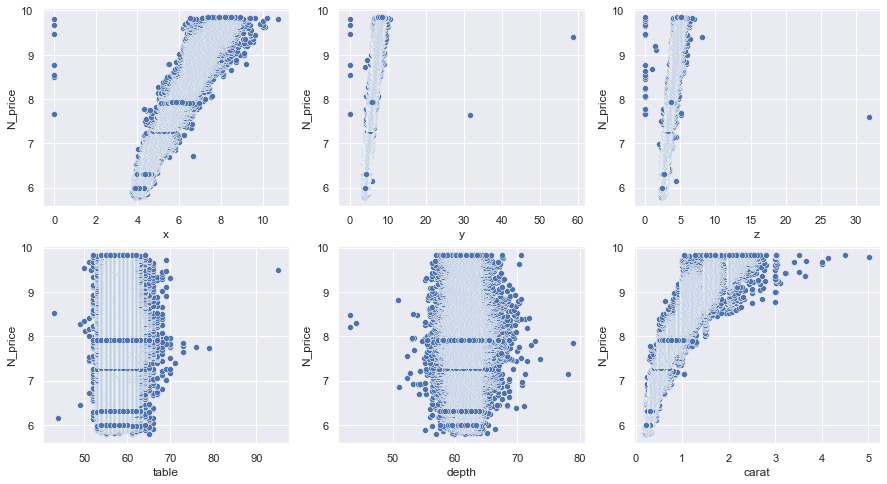

In [92]:
f, axes = plt.subplots(2,3, figsize=(15,8))
plt.subplots_adjust(wspace=0.2, hspace=0.2) # 좌우/ 상하 여백
axes = axes.flatten()
for col, ax in zip(nums, axes):
    sns.scatterplot(data=df,x=col, y=y, ax=ax)

* `hue` 옵션에 `color` 추가해서 그리기 

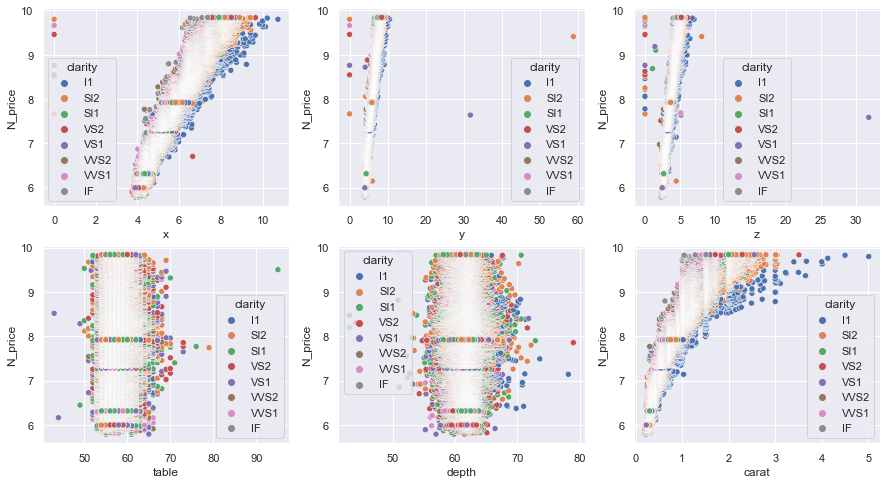

In [95]:
f, axes = plt.subplots(2,3, figsize=(15,8))
plt.subplots_adjust(wspace=0.2, hspace=0.2) # 좌우/ 상하 여백
axes = axes.flatten()
for col, ax in zip(nums, axes):
    sns.scatterplot(data=df,x=col, y=y, ax=ax, hue="clarity")

* `regplot`으로 회귀 시각화

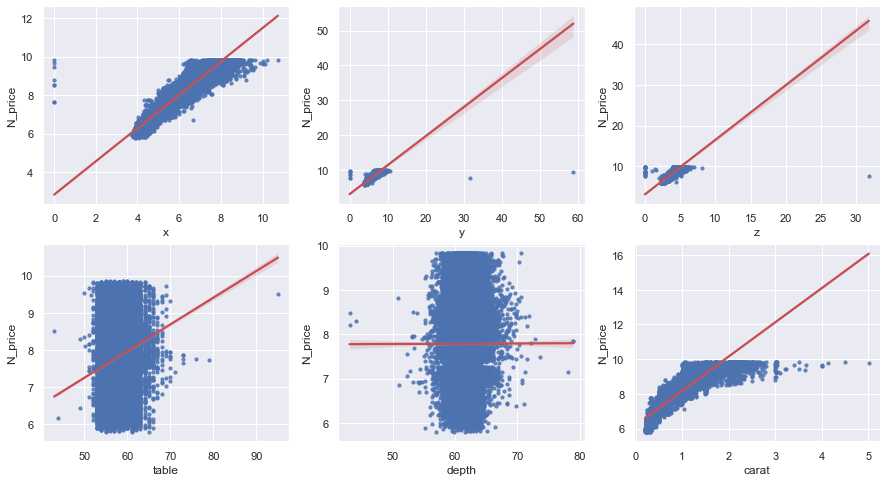

In [93]:
f, axes = plt.subplots(2,3, figsize=(15,8))
plt.subplots_adjust(wspace=0.2, hspace=0.2) # 좌우/ 상하 여백
axes = axes.flatten()
for col, ax in zip(nums, axes):
    sns.regplot(data=df,x=col, y=y, ax=ax, scatter_kws={"s":10}, line_kws={"color":"r"})

* `residplot`으로 잔차 시각화

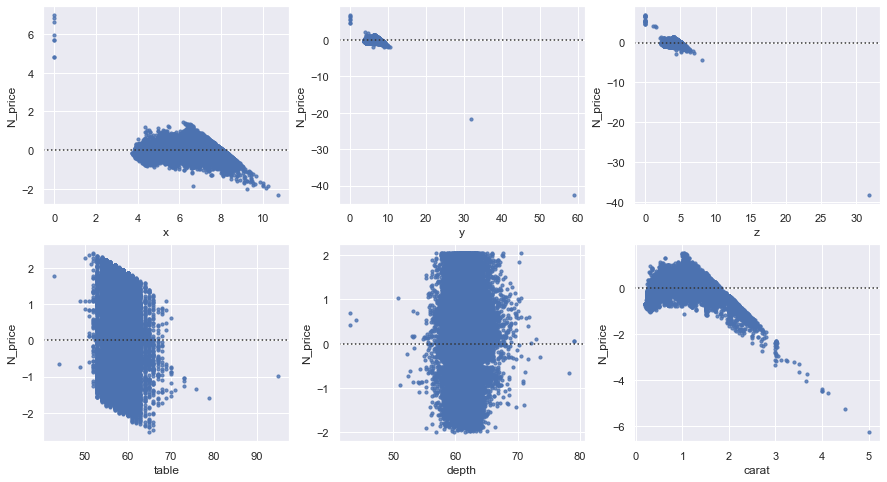

In [96]:
f, axes = plt.subplots(2,3, figsize=(15,8))
plt.subplots_adjust(wspace=0.2, hspace=0.2) # 좌우/ 상하 여백
axes = axes.flatten()
for col, ax in zip(nums, axes):
    sns.residplot(data=df,x=col, y=y, ax=ax, scatter_kws={"s":10})

* `lmplot`으로 `color`별 회귀 시각화

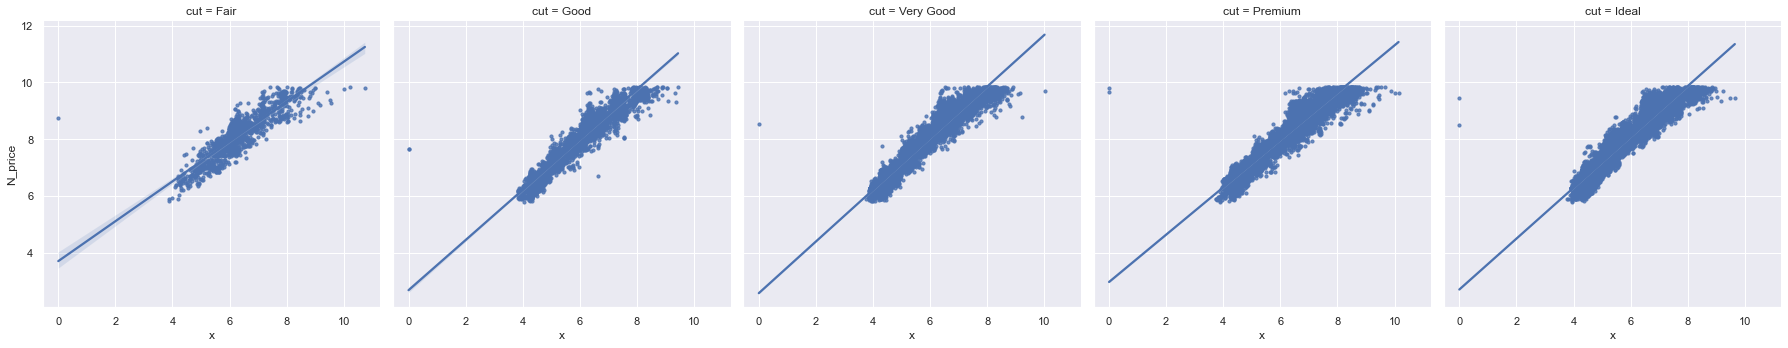

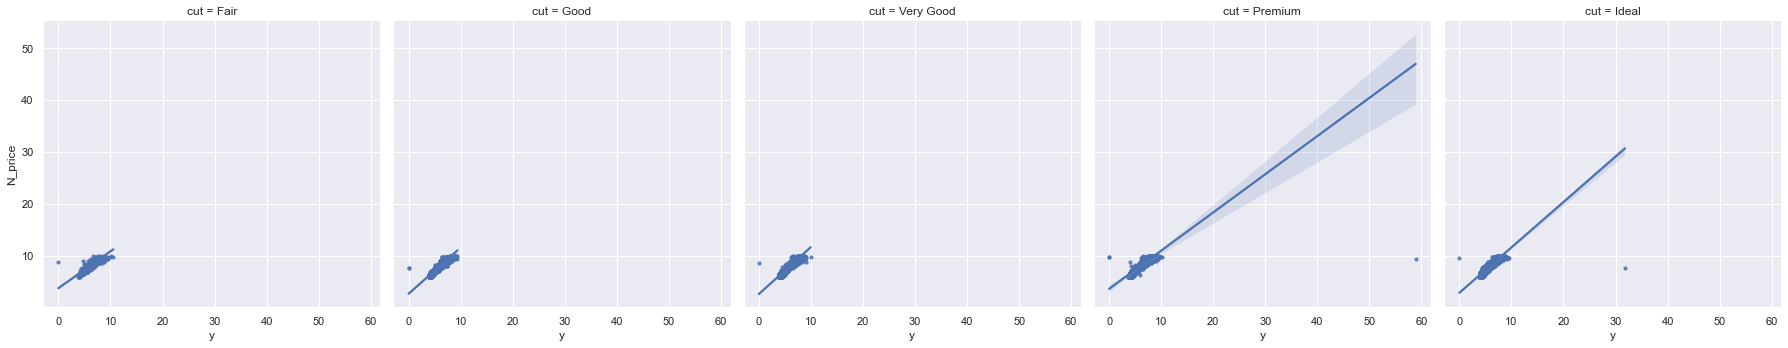

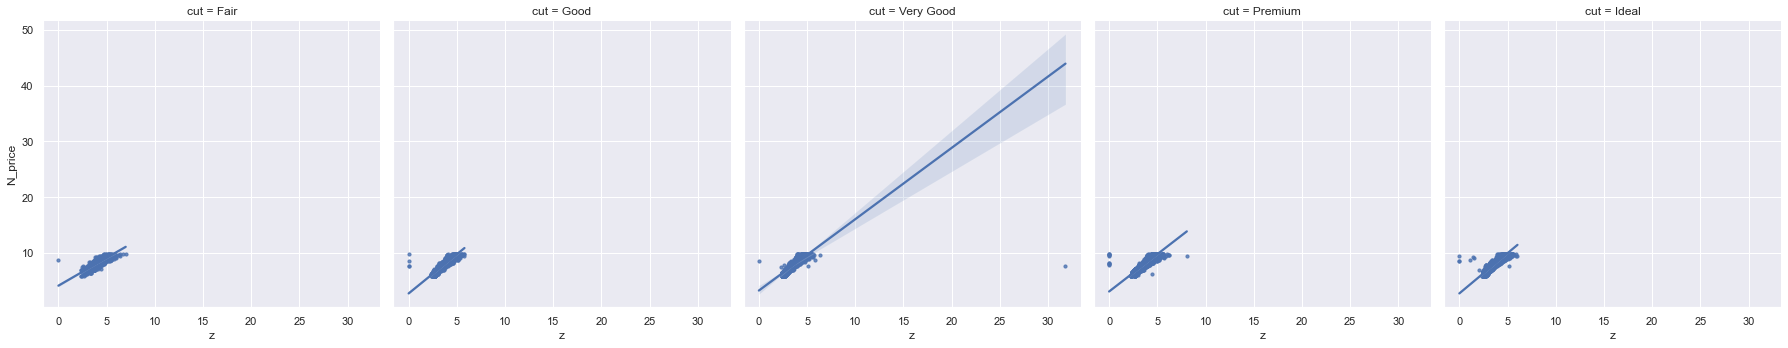

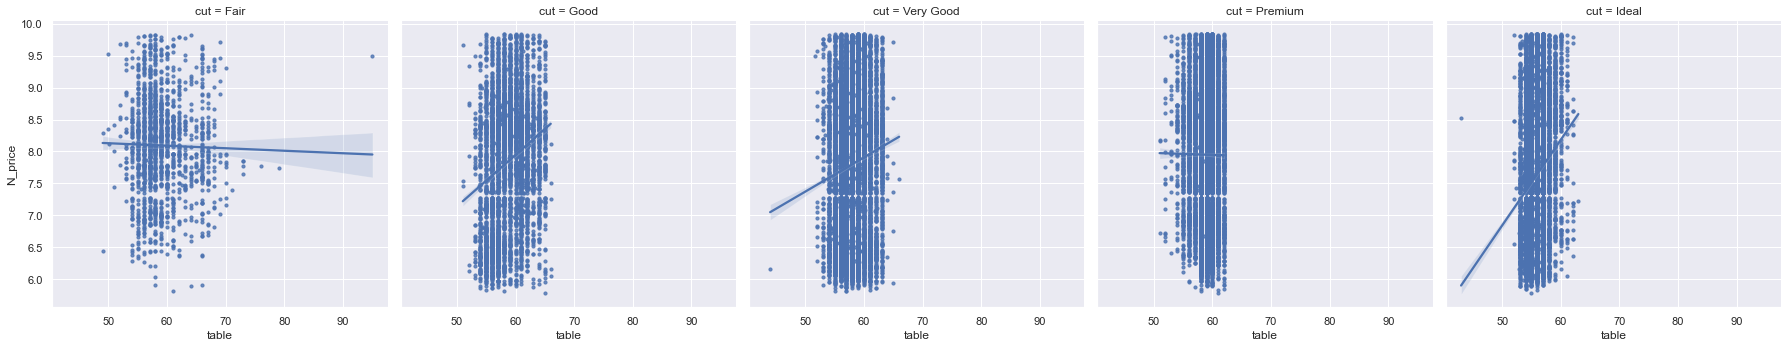

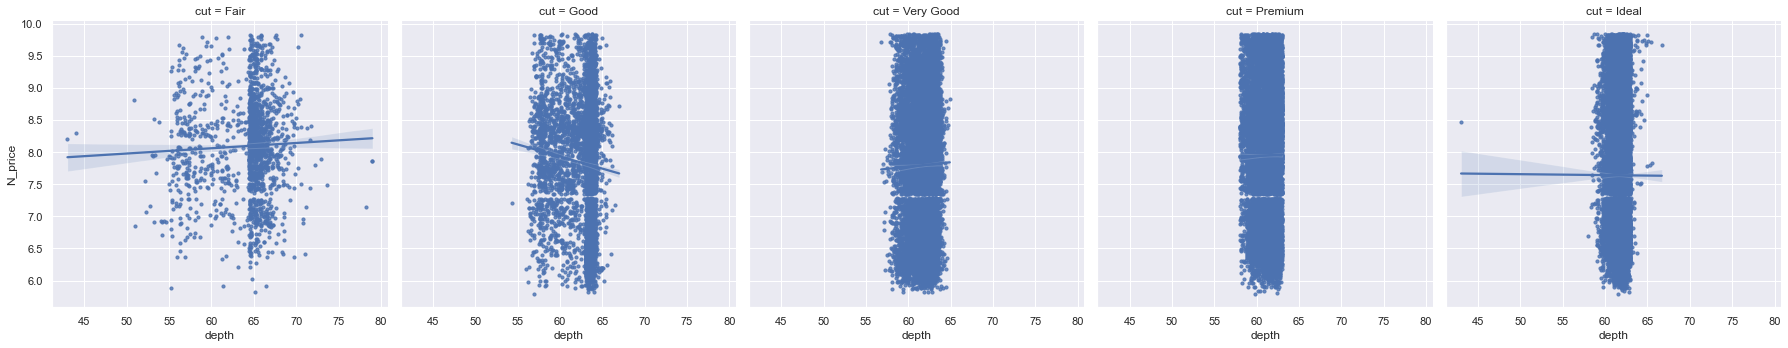

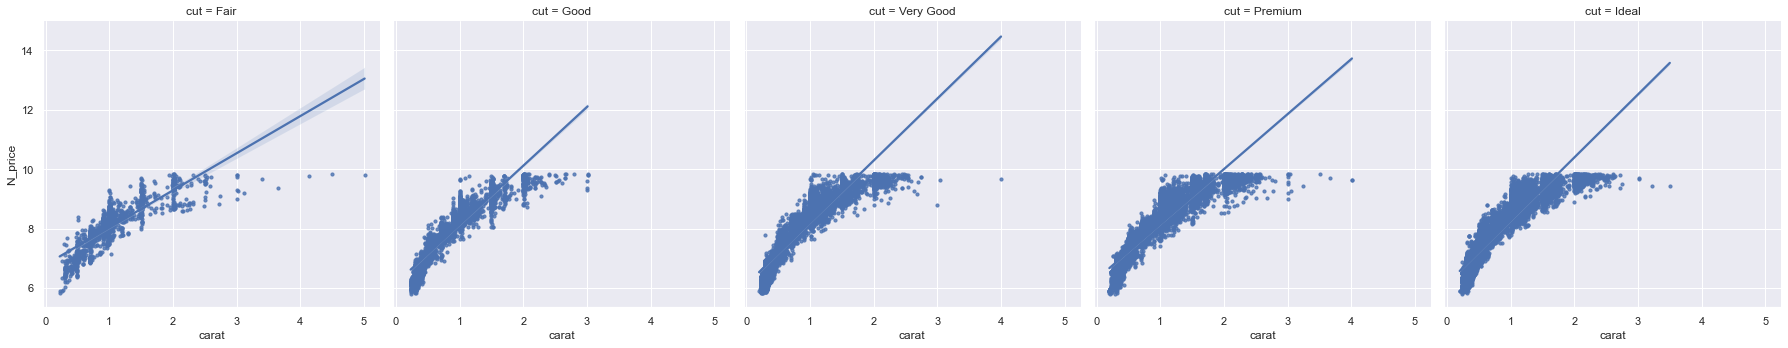

In [98]:
for col in nums:
    sns.lmplot(data=df,x=col, y=y, scatter_kws={"s":10}, col="cut")